<a href="https://colab.research.google.com/github/fargonemaciel/infnet-machine-learning-codes/blob/main/feature_engineering_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import kagglehub
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path = kagglehub.dataset_download("yelp-dataset/yelp-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'yelp-dataset' dataset.
Path to dataset files: /kaggle/input/yelp-dataset


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
biz_file = pd.read_json("/content/drive/MyDrive/Colab Notebooks/Arquives/yelp_academic_dataset_business.json", lines=True)

biz_file.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [19]:
biz_file.shape

(150346, 14)

In [34]:
biz_file['review_count'].value_counts().sort_values()

,count
review_count,
873,1
2679,1
1195,1
1886,1
1520,1
...,...
9,6875
8,8040
7,9594


In [22]:
biz_file.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

Text(0, 0.5, 'Ocurrence')

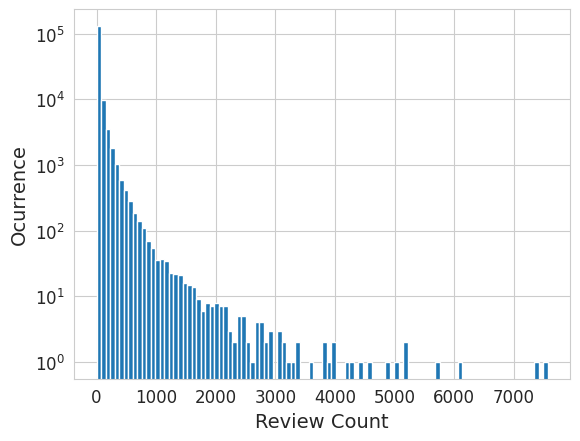

In [27]:
#Histogram from Review Counts

sns.set_style("whitegrid")
fig, ax = plt.subplots()
biz_file['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=12)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Ocurrence', fontsize=14)

In [28]:
deciles = biz_file['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

,review_count
0.1,6.0
0.2,7.0
0.3,9.0
0.4,11.0
0.5,15.0
0.6,20.0
0.7,30.0
0.8,48.0
0.9,97.0


Text(0, 0.5, 'Ocurrence')

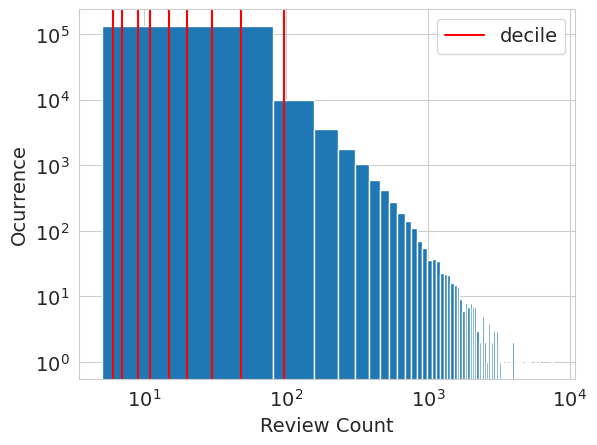

In [35]:
fig, ax = plt.subplots()
biz_file['review_count'].hist(ax=ax, bins=100)
for pos in deciles:
  handle = plt.axvline(pos, color='r')
ax.legend([handle], ['decile'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Ocurrence', fontsize=14)